# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Create dataframe
mouse_metadata_df=pd.DataFrame(mouse_metadata)
mouse_metadata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [110]:
mouse_metadata_df.shape

(249, 5)

In [111]:
study_results_df=pd.DataFrame(study_results)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [112]:
study_results_df.shape

(1893, 4)

In [113]:

# Combine the data into a single DataFrame
merge_mouse_scc_df=pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")



In [114]:

# Display the data table for preview
merge_mouse_scc_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [115]:
# getting individual mouse id for the data
#merge_mouse_scc_df.loc[merge_mouse_scc_df['Mouse ID']=="k403",:]

In [116]:
# Checking the number of mice.
number_mice=merge_mouse_scc_df["Mouse ID"].nunique()
print(f"Number of mice : {number_mice}")

Number of mice : 249


In [117]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id=merge_mouse_scc_df.loc[merge_mouse_scc_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id=merge_mouse_scc_df[merge_mouse_scc_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=pd.DataFrame(merge_mouse_scc_df.drop_duplicates(subset=["Mouse ID","Timepoint"]))
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice in the clean DataFrame.

clean_number_mice=clean_data_df["Mouse ID"].nunique()
clean_number_mice

249

## Summary Statistics

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean=clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).mean()

median=clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).median()

variance=clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).var()

standard_deviation=clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).std()

SEM=clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).sem()

             

In [122]:


# Assemble the resulting series into a single summary DataFrame.
summary_stat_dict={"Mean Tumor volume":mean,
                   "Median Tumor volume":median,
                   "Variance Tumor volume":variance,
                   "Standard deviation Tumor volume":standard_deviation,
                   "SEM Tumor volume":SEM,}     
summary_stat_dict_df=pd.DataFrame(summary_stat_dict)
summary_stat_dict_df


,Mean Tumor volume,Median Tumor volume,Variance Tumor volume,Standard deviation Tumor volume,SEM Tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_method_summarystats=clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).agg(["mean","median","var","std","sem"])
advanced_method_summarystats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_regimen=clean_data_df["Mouse ID"].groupby(clean_data_df["Drug Regimen"]).count()
mice_count_regimen


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Drug regimen analysis')

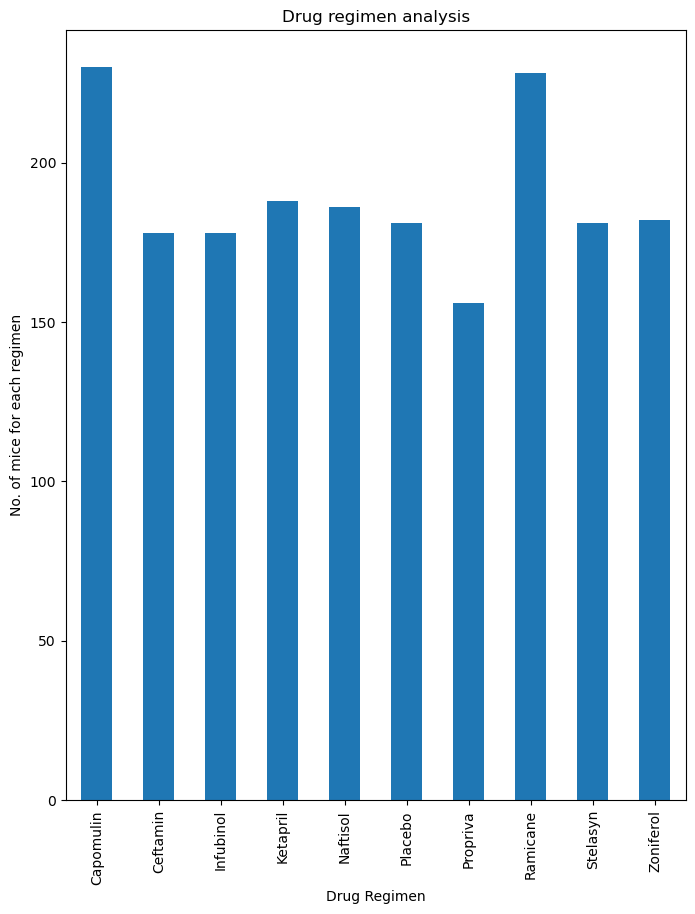

In [125]:
drug_regimen_chart=mice_count_regimen.plot(kind="bar", figsize=(8,10))
drug_regimen_chart.set_xlabel("Drug Regimen")
drug_regimen_chart.set_ylabel("No. of mice for each regimen")
drug_regimen_chart.set_title("Drug regimen analysis")


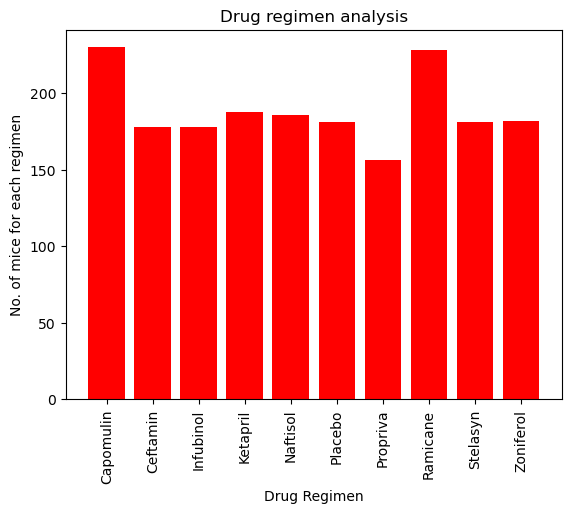

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count_regimen.index.values
y_axis = mice_count_regimen.values
plt.bar(x_axis,y_axis, color = "r", align = "center")
plt.title("Drug regimen analysis")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of mice for each regimen")
plt.xticks(rotation="vertical")
plt.show()

Gender distribution : Sex
Male      958
Female    930
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

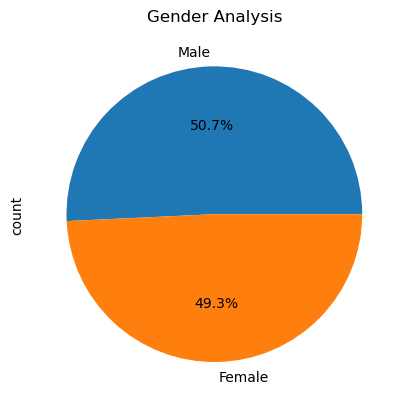

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=clean_data_df["Sex"].value_counts()
print(f"Gender distribution : {gender_data}")
plt.title("Gender Analysis")
gender_data.plot.pie(autopct = "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

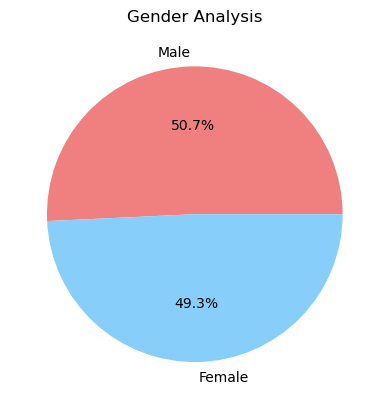

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
sizes = [958,930]
colors = ["lightcoral","lightskyblue"]
plt.title("Gender Analysis")
plt.pie(sizes,labels=labels,colors=colors,autopct= "%1.1f%%")
plt.show


## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane" ,:]
Infubinol_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Infubinol" ,:]
Ceftamin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ceftamin" ,:]


In [129]:
# Start by getting the last (greatest) timepoint for each mouse for capomulin
capomulin_greatest = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_greatest_df = pd.DataFrame(capomulin_greatest)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(clean_data_df,capomulin_greatest_df, on=("Mouse ID","Timepoint"))
capomulin_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


In [130]:
# Start by getting the last (greatest) timepoint for each mouse for Ramicane
Ramicane_greatest = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_greatest_df = pd.DataFrame(Ramicane_greatest)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(clean_data_df,Ramicane_greatest_df, on=("Mouse ID","Timepoint"))
Ramicane_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0


In [131]:
# Start by getting the last (greatest) timepoint for each mouse for Infubinol
Infubinol_greatest = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_greatest_df = pd.DataFrame(Infubinol_greatest)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(clean_data_df,Infubinol_greatest_df, on=("Mouse ID","Timepoint"))
Infubinol_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a577,Infubinol,Female,6,25,30,57.031862,2
3,a685,Infubinol,Male,8,30,45,66.083066,3
4,c139,Infubinol,Male,11,28,45,72.226731,2


In [132]:
# Start by getting the last (greatest) timepoint for each mouse for Ceftamin
Ceftamin_greatest = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_greatest_df = pd.DataFrame(Ceftamin_greatest)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(clean_data_df,Ceftamin_greatest_df, on=("Mouse ID","Timepoint"))
Ceftamin_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset     
    # Determine outliers using upper and lower bounds
# Calculate the IQR and quantitatively determine if there are any potential outliers for capomulin regimen
capomulin_scc = capomulin_merge["Tumor Volume (mm3)"]

quartiles=capomulin_scc.quantile([0.25,0.5,0.75])
lowerq=quartiles[0.25]
median=quartiles[0.5]
upperq=quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of capomulin scc : {lowerq}")
print(f"The median of capomulin scc : {median}")
print(f"The upper quartile of capomulin scc : {upperq}")
print(f"The interquartile range of capomulin scc : {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Value below {lower_bound} are potential outliers")
print(f"Value above {upper_bound} are potential outliers.")


The lower quartile of capomulin scc : 32.37735684
The median of capomulin scc : 38.1251644
The upper quartile of capomulin scc : 40.1592203
The interquartile range of capomulin scc : 7.781863460000004
Value below 20.70456164999999 are potential outliers
Value above 51.83201549 are potential outliers.


In [134]:

# Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane regimen

ramicane_scc= Ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_scc.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq - lowerq


print(f"The lower quartile of ramicane scc : {lowerq}")
print(f"The median of ramicane scc : {median}")
print(f"The upper quartile of ramicane scc : {upperq}")
print(f"The interquartile range of ramicane scc : {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Value below {lower_bound} are potential outliers")
print(f"Value above {upper_bound} are potential outliers.")

    


The lower quartile of ramicane scc : 31.56046955
The median of ramicane scc : 36.56165229
The upper quartile of ramicane scc : 40.65900627
The interquartile range of ramicane scc : 9.098536719999998
Value below 17.912664470000003 are potential outliers
Value above 54.30681135 are potential outliers.


In [135]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol regimen


Infubinol_scc = Infubinol_merge["Tumor Volume (mm3)"]

quartiles=Infubinol_scc.quantile([0.25,0.5,0.75])
lowerq=quartiles[0.25]
median=quartiles[0.5]
upperq=quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of Infubinol scc : {lowerq}")
print(f"The median of Infubinol scc : {median}")
print(f"The upper quartile of Infubinol scc : {upperq}")
print(f"The interquartile range of Infubinol scc : {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Value below {lower_bound} are potential outliers")
print(f"Value above {upper_bound} are potential outliers.")


The lower quartile of Infubinol scc : 54.04860769
The median of Infubinol scc : 60.16518046
The upper quartile of Infubinol scc : 65.52574285
The interquartile range of Infubinol scc : 11.477135160000003
Value below 36.83290494999999 are potential outliers
Value above 82.74144559000001 are potential outliers.


In [136]:

# Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin regimen

Ceftamin_scc = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles=Ceftamin_scc.quantile([0.25,0.5,0.75])
lowerq=quartiles[0.25]
median=quartiles[0.5]
upperq=quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of Ceftamin scc : {lowerq}")
print(f"The median of Ceftamin scc : {median}")
print(f"The upper quartile of Ceftamin scc : {upperq}")
print(f"The interquartile range of Ceftamin scc : {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Value below {lower_bound} are potential outliers")
print(f"Value above {upper_bound} are potential outliers.")


The lower quartile of Ceftamin scc : 48.72207785
The median of Ceftamin scc : 59.85195552
The upper quartile of Ceftamin scc : 64.29983003
The interquartile range of Ceftamin scc : 15.577752179999997
Value below 25.355449580000002 are potential outliers
Value above 87.66645829999999 are potential outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

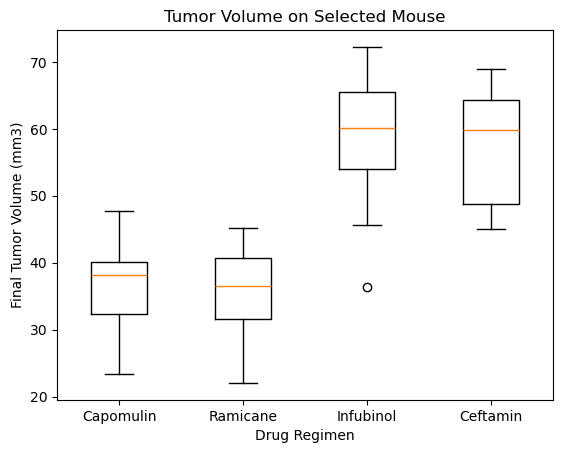

In [137]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
scc_data_plot=[capomulin_scc,ramicane_scc,Infubinol_scc,Ceftamin_scc]
Regimen_Label = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
fig,ax = plt.subplots()
ax.set_title("Tumor Volume on Selected Mouse")
plt.plot()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")
ax.boxplot(scc_data_plot,labels=Regimen_Label,)
plt.show


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

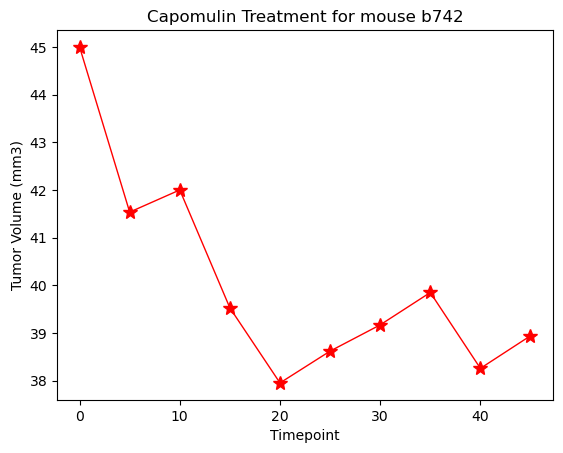

In [138]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df=capomulin_df.loc[capomulin_df["Mouse ID"] == "b742",:]
line_df.head(10)
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]
fig,ax = plt.subplots()
plt.plot(x_axis,y_axis,linewidth=1,marker="*",markersize=10, color="r")
plt.title("Capomulin Treatment for mouse b742")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [139]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumorvolume_mouse=capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df["Mouse ID"]).mean()
average_tumorvolume_mouse_df=pd.DataFrame(average_tumorvolume_mouse)
mouse_weight_capo=capomulin_df["Weight (g)"].groupby(capomulin_df["Mouse ID"]).mean()
mouse_weight_capo_df=pd.DataFrame(mouse_weight_capo)
mouse_weight_capo_df


,Weight (g)
Mouse ID,
b128,22.0
b742,21.0
f966,17.0
g288,19.0
g316,22.0
i557,24.0
i738,20.0
j119,23.0
j246,21.0


<function matplotlib.pyplot.show(close=None, block=None)>

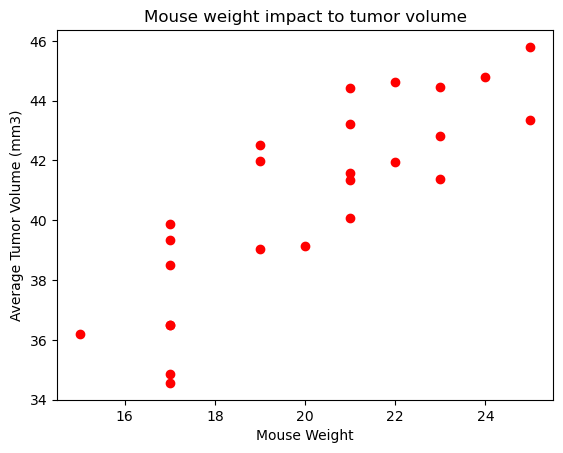

In [140]:

fig1,ax1=plt.subplots()
marker_size=15
plt.scatter(mouse_weight_capo_df["Weight (g)"],average_tumorvolume_mouse_df["Tumor Volume (mm3)"],color="r")
plt.title("Mouse weight impact to tumor volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show


## Correlation and Regression

In [106]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
